In [1]:
import pandas as pd

In [4]:
stock_data = pd.read_parquet('../data/historical/day/RELIANCE/')

In [6]:
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-01 00:00:00+05:30,922.70,922.70,907.50,909.75,4321686
2018-01-02 00:00:00+05:30,913.00,919.55,906.40,911.15,4342815
2018-01-03 00:00:00+05:30,925.00,926.00,913.05,914.80,6175312
2018-01-04 00:00:00+05:30,918.15,921.80,915.70,920.30,4118581
2018-01-05 00:00:00+05:30,921.80,926.90,920.25,923.25,3401905


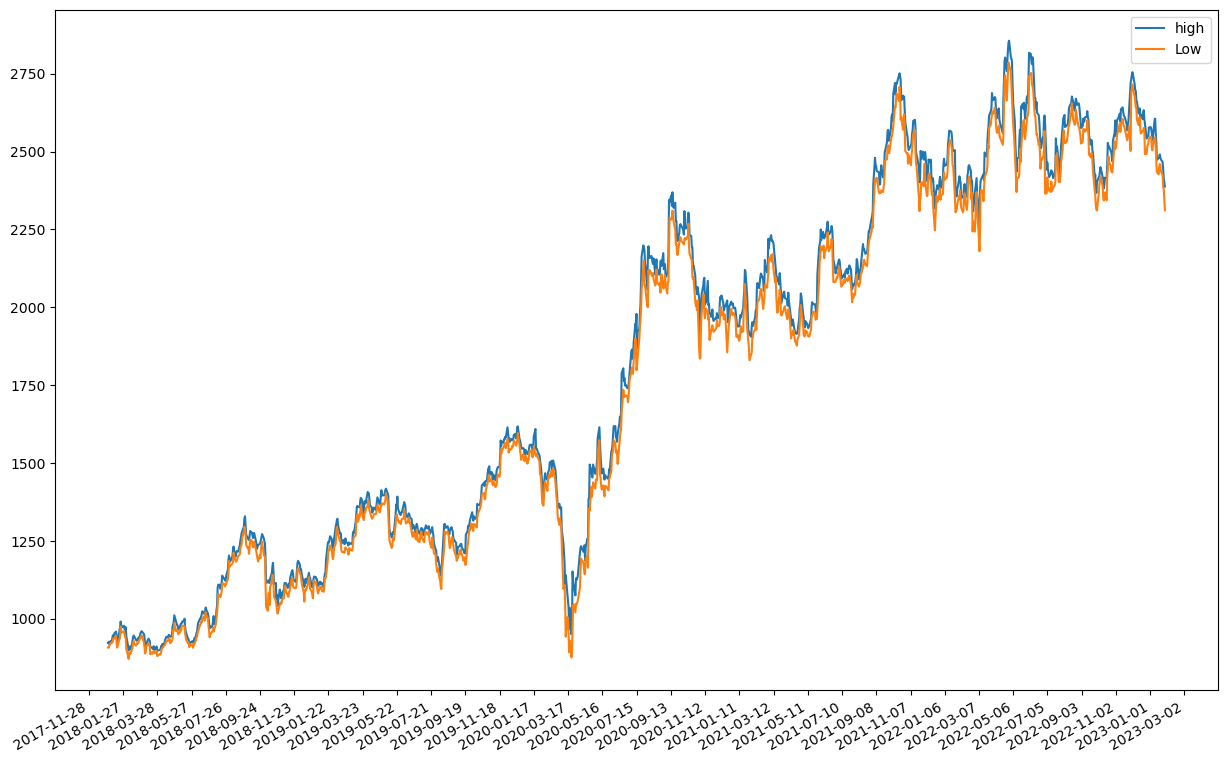

In [11]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt 

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
# x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]
plt.plot(stock_data.index, stock_data['High'], label = 'high')
plt.plot(stock_data.index, stock_data['Low'], label = 'Low')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error



In [17]:
target_y = stock_data["Close"]
X_feat = stock_data.iloc[:,0:3]

In [22]:
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns,
data = X_ft,
index=X_feat.index)

In [23]:
def lstm_split(data, n_steps):
    X,y = [],[]
    for i in range(len(data)-n_steps + 1):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps-1,-1])

    return np.array(X), np.array(y)

In [24]:
X1, y1 = lstm_split(stock_data.values, n_steps=2)

train_split = 0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, x_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1.shape, X_train.shape, X_test.shape, y_test.shape)



(1297, 2, 4) (1038, 2, 4) (259, 2, 4) (259,)


In [25]:
lstm =  Sequential()

lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]),
activation="relu", return_sequences=True) )

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer="adam")
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 32)             4736      
                                                                 
 dense (Dense)               (None, 2, 1)              33        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=4,
 shuffle = False)

In [31]:
y_pred = lstm.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [35]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(rmse,mape)

ValueError: Found array with dim 3. Estimator expected <= 2.

## other method

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
stock_data = pd.read_parquet('../data/historical/day/RELIANCE/')
dataset_train = stock_data.copy()
training_set = dataset_train.iloc[:, 1:2].values

In [42]:
# training_set

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
list(training_set_scaled[i-60:i, 0]

array([0.01208999, 0.0153803 , 0.01323777, 0.01583941, 0.01793093,
       0.02451155, 0.026297  , 0.0238739 , 0.02905168, 0.03195939,
       0.02645003, 0.01691068, 0.01721675, 0.01966536, 0.04001938,
       0.04851298, 0.04381982, 0.03884609, 0.04154976, 0.03568331,
       0.03502015, 0.03915217, 0.03915217, 0.02453706, 0.0084936 ,
       0.00109677, 0.0048717 , 0.00754986, 0.00313727, 0.01140132,
       0.02379738, 0.02545529, 0.02384839, 0.01844105, 0.01719125,
       0.01869612, 0.01793093, 0.02150181, 0.02502168, 0.03058205,
       0.03124522, 0.03267357, 0.03267357, 0.02769984, 0.02058358,
       0.00683569, 0.00951385, 0.01198796, 0.01900219, 0.02048156,
       0.01846656, 0.01714023, 0.00706525, 0.00563689, 0.00415753,
       0.00331582, 0.00821303, 0.00211702, 0.00431056, 0.00760088])

In [14]:
X_train = []
y_train = []
for i in range(60, 2035):
    np.append(X_train,training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

IndexError: tuple index out of range

In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [8]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 6.2538e-05
Epoch 2/100
1/1 [==============================] - 0s 56ms/step - loss: 1.4570e-04
Epoch 3/100
1/1 [==============================] - 0s 51ms/step - loss: 4.3098e-06
Epoch 4/100
1/1 [==============================] - 0s 57ms/step - loss: 1.5642e-04
Epoch 5/100
1/1 [==============================] - 0s 49ms/step - loss: 4.5652e-05
Epoch 6/100
1/1 [==============================] - 0s 56ms/step - loss: 1.5386e-06
Epoch 7/100
1/1 [==============================] - 0s 69ms/step - loss: 1.6218e-06
Epoch 8/100
1/1 [==============================] - 0s 63ms/step - loss: 1.0385e-05
Epoch 9/100
1/1 [==============================] - 0s 59ms/step - loss: 2.4449e-05
Epoch 10/100
1/1 [==============================] - 0s 56ms/step - loss: 6.0258e-05
Epoch 11/100
1/1 [==============================] - 0s 62ms/step - loss: 4.1960e-05
Epoch 12/100
1/1 [==============================] - 0s 70ms/step - loss: 8.1798e-06
Epo

In [9]:
dataset_test = stock_data.copy()
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [15]:
pd.read_excel(r"C:\Users\akash.verma\Downloads\Telegram Desktop\Option Calculator (2).xlsx")

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Call Option Calculator,NaN,NaN,NaN,Put Option Calculator,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Price of the underlying,36587.000000,NaN,Price of the underlying,36587
3,NaN,NaN,Risk-free interest rate (%),10.000000,NaN,Risk-free interest rate (%),10
4,NaN,NaN,Strike price,36600.000000,NaN,Strike price,36600
5,NaN,NaN,Time to expiration (days left),7.000000,NaN,Time to expiration (days left),7
6,NaN,NaN,Annual volatility (%),24.070000,NaN,Annual volatility (%),20/
7,NaN,NaN,Dividend yield (%),0.000000,NaN,Dividend yield (%),0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,Price,515.230533,NaN,Price,NaN


In [20]:
import openpyxl
wbFile = openpyxl.load_workbook(filename = r"C:\Users\akash.verma\Downloads\Telegram Desktop\Option Calculator (2).xlsx",data_only=False)
wsFile = wbFile["Sheet1"]

In [42]:
for i in wsFile.values:
    print(i)

(None, None, None, None, None, None, None)
(None, 'Call Option Calculator', None, None, None, 'Put Option Calculator', None)
(None, None, None, None, None, None, None)
(None, None, 'Price of the underlying', 36587, None, 'Price of the underlying', 36587)
(None, None, 'Risk-free interest rate (%)', 10, None, 'Risk-free interest rate (%)', 10)
(None, None, 'Strike price', 36600, None, 'Strike price', 36600)
(None, None, 'Time to expiration (days left)', 7, None, 'Time to expiration (days left)', 7)
(None, None, 'Annual volatility (%)', 24.07, None, 'Annual volatility (%)', '20/')
(None, None, 'Dividend yield (%)', 0, None, 'Dividend yield (%)', 0)
(None, None, None, None, None, None, None)
(None, None, 'Price', '=((D4*EXP(((-1*D23)*D22)))*NORMSDIST(D24))-((D6*EXP(((-1*D20)*D22)))*NORMSDIST(D25))', None, 'Price', '=((G6*EXP(((-1*G20)*G22)))*NORMSDIST((-1*G25)))-((G4*EXP(((-1*G23)*G22)))*NORMSDIST((-1*G24)))')
(None, None, 'Delta', '=EXP(((-1*D23)*D22))*NORMSDIST(D24)', None, 'Delta', '=EX

In [ ]:
None, None, None, None, None, None, None
None, 'Call Option Calculator', None, None, None, 'Put Option Calculator', None
None, None, None, None, None, None, None
None, None, 'Price of the underlying', 36587, None, 'Price of the underlying', 36587
None, None, 'Risk-free interest rate (%)', 10, None, 'Risk-free interest rate (%)', 10
None, None, 'Strike price', 36600, None, 'Strike price', 36600
None, None, 'Time to expiration (days left)', 7, None, 'Time to expiration (days left)', 7
None, None, 'Annual volatility (%)', 24.07, None, 'Annual volatility (%)', '20/'
None, None, 'Dividend yield (%)', 0, None, 'Dividend yield (%)', 0
None, None, None, None, None, None, None
None, None, 'Price', '=((D4*EXP(((-1*D23)*D22)))*NORMSDIST(D24))-((D6*EXP(((-1*D20)*D22)))*NORMSDIST(D25))', None, 'Price', '=((G6*EXP(((-1*G20)*G22)))*NORMSDIST((-1*G25)))-((G4*EXP(((-1*G23)*G22)))*NORMSDIST((-1*G24)))'
None, None, 'Delta', '=EXP(((-1*D23)*D22))*NORMSDIST(D24)', None, 'Delta', '=EXP(((-1*G23)*G22))*((NORMSDIST(G24))-1)'
None, None, 'Theta', '=((((-1*((((D4*((1/SQRT((2*PI())))*EXP(((-1*POWER(D24,2))/2))))*D21)*EXP(((-1*D22)*D23)))/(2*SQRT(D22))))+((D23*D4)*D12))-(((D20*D6)*EXP(((-1*D20)*D22)))*NORMSDIST(D25))))/365', None, 'Theta', '=(((((-1*((((G4*((1/SQRT((2*PI())))*EXP(((-1*POWER(G24,2))/2))))*G21)*EXP(((-1*G22)*G23)))))/(2*SQRT(G22)))-(((G23*G4)*NORMSDIST((-1*G24)))*EXP(((-1*G22)*G23))))+(((G20*G6)*EXP(((-1*G20)*G22)))*NORMSDIST((-1*G25)))))/365'
None, None, 'Gamma', '=((((1/SQRT((2*PI())))*EXP(((-1*POWER(D24,2))/2)))*EXP(((-1*D22)*D23)))/((D4*D21)*SQRT(D22)))', None, 'Gamma', '=((((1/SQRT((2*PI())))*EXP(((-1*POWER(G24,2))/2)))*EXP(((-1*G22)*G23)))/((G4*G21)*SQRT(G22)))'
None, None, 'Vega', '=(((((1/SQRT((2*PI())))*EXP(((-1*POWER(D24,2))/2)))*EXP(((-1*D22)*D23)))*D4)*SQRT(D22))/100', None, 'Vega', '=(((((1/SQRT((2*PI())))*EXP(((-1*POWER(G24,2))/2)))*EXP(((-1*G22)*G23)))*G4)*SQRT(G22))/100'
None, None, 'Rho', '=((((D6*D22)*EXP(((-1*D20)*D22)))*NORMSDIST(D25))*EXP(((-1*D23)*D22)))/100', None, 'Rho', '=(((((-1*G6)*G22)*EXP(((-1*G20)*G22)))*NORMSDIST((-1*G25)))*EXP(((-1*G23)*G22)))/100'
None, None, None, None, None, None, None
None, None, None, None, None, None, None
None, None, None, None, None, None, None
None, None, 'R : risk free rate of interest', '=D5/100', None, 'R : risk free rate of interest', '=G5/100'
None, None, 'o : volatility', '=D8/100', None, 'o : volatility', '=G8/100'
None, None, 'T-t : time to expiration', '=D7/365', None, 'T-t : time to expiration', '=G7/365'
None, None, ' dividend yield', '=D9/100', None, ' dividend yield', '=G9/100'
None, None, 'd1 :', '=(LN((D4/D6))+(((D20-D23)+(POWER(D21,2)/2))*D22))/(D21*SQRT(D22))', None, 'd1 :', '=(LN((G4/G6))+(((G20-G23)+(POWER(G21,2)/2))*G22))/(G21*SQRT(G22))'
None, None, 'd2 :', '=(LN((D4/D6))+(((D20-D23)-(POWER(D21,2)/2))*D22))/(D21*SQRT(D22))', None, 'd2 :', '=(LN((G4/G6))+(((G20-G23)-(POWER(G21,2)/2))*G22))/(G21*SQRT(G22))'

In [35]:
wsFile.save('temp1.xlsx')

AttributeError: 'Worksheet' object has no attribute 'save'

In [37]:
import xlwings as xw
wbxl=xw.Book(r"C:\Users\akash.verma\Downloads\Telegram Desktop\Option Calculator (2).xlsx")


In [38]:
wbxl['']

<Book [Option Calculator (2).xlsx]>

In [34]:
wbxl.save('temp.xlsx')

In [41]:
wbxl.sheets['Sheet1'].value

AttributeError: 'Sheet' object has no attribute 'value'

(None, None, None, None, None, None, None)
(None, 'Call Option Calculator', None, None, None, 'Put Option Calculator', None)
(None, None, None, None, None, None, None)
(None, None, 'Price of the underlying', 36587, None, 'Price of the underlying', 36587)
(None, None, 'Risk-free interest rate (%)', 10, None, 'Risk-free interest rate (%)', 10)
(None, None, 'Strike price', 36600, None, 'Strike price', 36600)
(None, None, 'Time to expiration (days left)', 7, None, 'Time to expiration (days left)', 7)
(None, None, 'Annual volatility (%)', 24.07, None, 'Annual volatility (%)', '20/')
(None, None, 'Dividend yield (%)', 0, None, 'Dividend yield (%)', 0)
(None, None, None, None, None, None, None)
(None, None, 'Price', '=((D4*EXP(((-1*D23)*D22)))*NORMSDIST(D24))-((D6*EXP(((-1*D20)*D22)))*NORMSDIST(D25))', None, 'Price', '=((G6*EXP(((-1*G20)*G22)))*NORMSDIST((-1*G25)))-((G4*EXP(((-1*G23)*G22)))*NORMSDIST((-1*G24)))')
(None, None, 'Delta', '=EXP(((-1*D23)*D22))*NORMSDIST(D24)', None, 'Delta', '=EX